# Analisi tamponi

In [18]:
import matplotlib.pyplot as plt
from aidam.math_utils import moving_function_rev1
import pickle as pkl
import numpy as np
import plotly.express as px

from aidam.aicharts import aidam_distribution_map

## Lettura dati

In [19]:
data_file='stored_data.pkl'

infile=open(data_file,'rb')
trend=pkl.load(infile)
regioni=pkl.load(infile)
giorni=pkl.load(infile)
giorno_settimana=pkl.load(infile)
popolazione=pkl.load(infile)
infile.close()

day_counter=list(range(len(giorni)))

print('Giorni osservati: %d'%len(giorni))
print('Primo giorno: %s'%giorni[0])
print('Ultimo giorno: %s'%giorni[-1])

Giorni osservati: 680
Primo giorno: 2020-02-24T18:00:00
Ultimo giorno: 2022-01-03T17:00:00


Calcolo le posizioni nella grid dei subplot dove mettere le figure delle varie regioni

In [20]:
# dimensioni figure (figsize) per figure singole e figure composte (subplot)
figsize_single=(9,6)
figsize_multi=(16,16)

grid_shape=(7,3)

posizioni=np.array(range(grid_shape[0]*grid_shape[1]))

posizioni=np.reshape(posizioni,grid_shape)

grid_cell={}
for r in range(grid_shape[0]):
    for c in range(grid_shape[1]):
        grid_cell[posizioni[r,c]]=(r,c)

## Tamponi effettuati

### Nazionale

In [21]:
'''
fig=px.scatter(x=giorni,
            y=[trend['tamponi_giornalieri']['Italia'],
               moving_function_rev1(trend['tamponi_giornalieri']['Italia'],np.nanmean,3,3)])
'''

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=giorni, y=trend['tamponi_giornalieri']['Italia'],
                    mode='lines',
                    name='Raw'))
fig.add_trace(go.Scatter(x=giorni, y=moving_function_rev1(trend['tamponi_giornalieri']['Italia'],np.nanmean,3,3),
                    mode='lines', name='Media settimanale'))


fig.update_layout(
    title="Tamponi effettuati",
    xaxis_title="Tamponi",
    yaxis_title="Data",
    legend_title="")

fig.data[0].name='Raw'
fig.data[1].name='Media settimanale'

fig.show()

#### Ultimi giorni

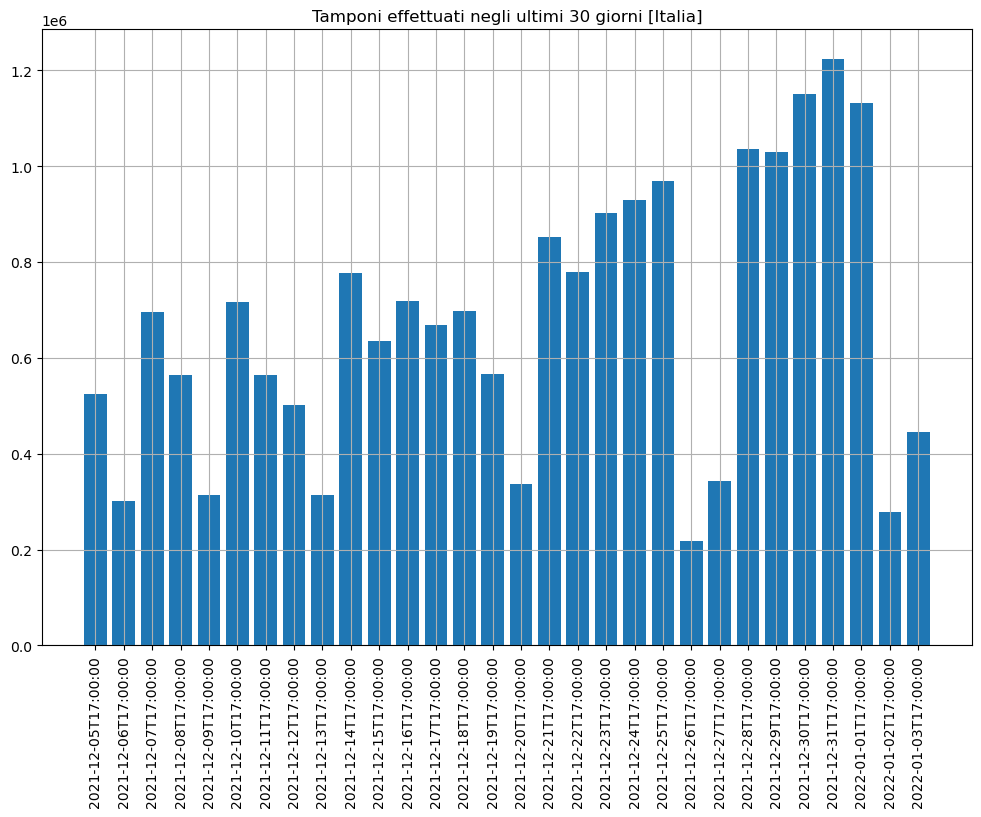

In [22]:
ultimi_giorni=30
regione='Italia'

plt.figure(figsize=(12,8))
plt.title('Tamponi effettuati negli ultimi %d giorni [%s]'%(ultimi_giorni,regione))
plt.bar(range(ultimi_giorni),trend['tamponi_giornalieri'][regione][-ultimi_giorni:])
plt.xticks(range(ultimi_giorni),giorni[-ultimi_giorni:],rotation=90)
plt.grid()
plt.show()

### Tamponi effettuati nell'ultima settimana nelle varie regioni

In [23]:
tamponi_ultima_sett=[np.sum(trend['tamponi_giornalieri'][r][-7:]) for r in regioni]

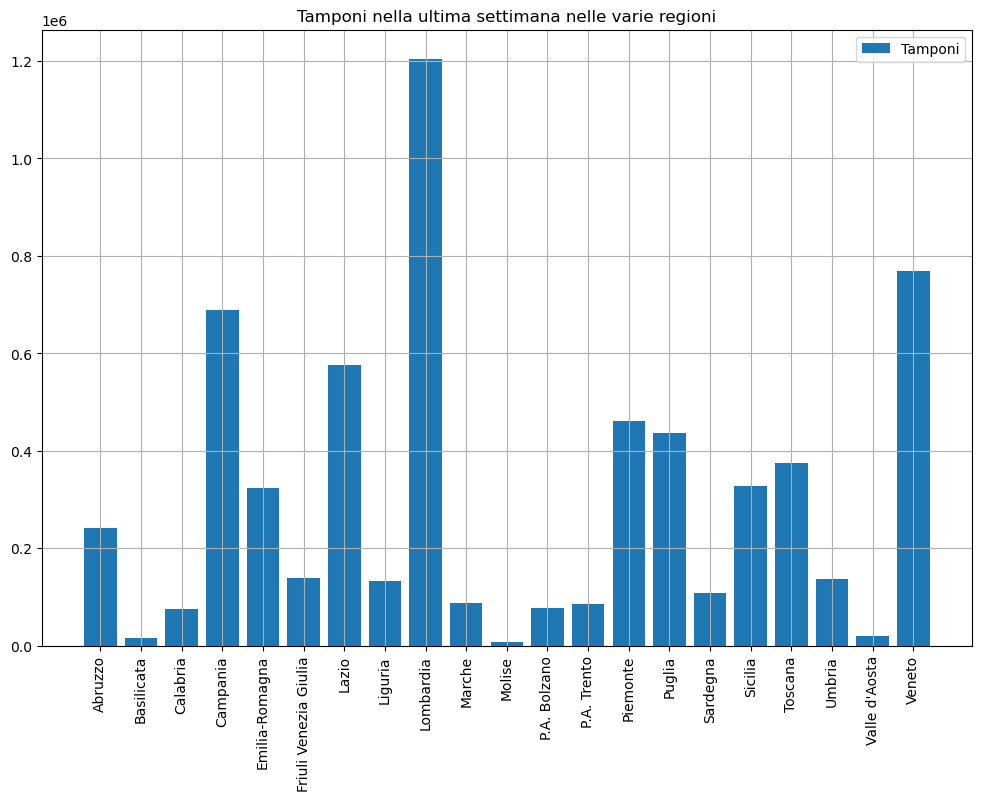

In [24]:
plt.figure(figsize=(12,8))
plt.title('Tamponi nella ultima settimana nelle varie regioni')
plt.bar(range(len(regioni)),tamponi_ultima_sett,label='Tamponi')
plt.xticks(range(len(regioni)),regioni,rotation=90)
plt.grid()
plt.legend()
plt.show()

## Percentuale tamponi positivi

### Nazionale nel tempo

In [25]:
# creo un DataFrame temporaneo
import pandas as pd
temp_df=pd.DataFrame({'Data':giorni,
                      '% Tamponi positivi':trend['perc_tamponi_positivi']['Italia'],
                      'Tamponi giornalieri':trend['tamponi_giornalieri']['Italia']})
temp_df.head()

,Data,% Tamponi positivi,Tamponi giornalieri
0,2020-02-24T18:00:00,inf,0.0
1,2020-02-25T18:00:00,2.163294,4299.0
2,2020-02-26T18:00:00,8.091286,964.0
3,2020-02-27T18:00:00,10.300783,2427.0
4,2020-02-28T18:00:00,6.465634,3681.0


In [26]:
fig=px.scatter(data_frame=temp_df,
              x='Data',
              y='% Tamponi positivi',
              color='Tamponi giornalieri')
fig.show()

### Nazionale ultimi giorni

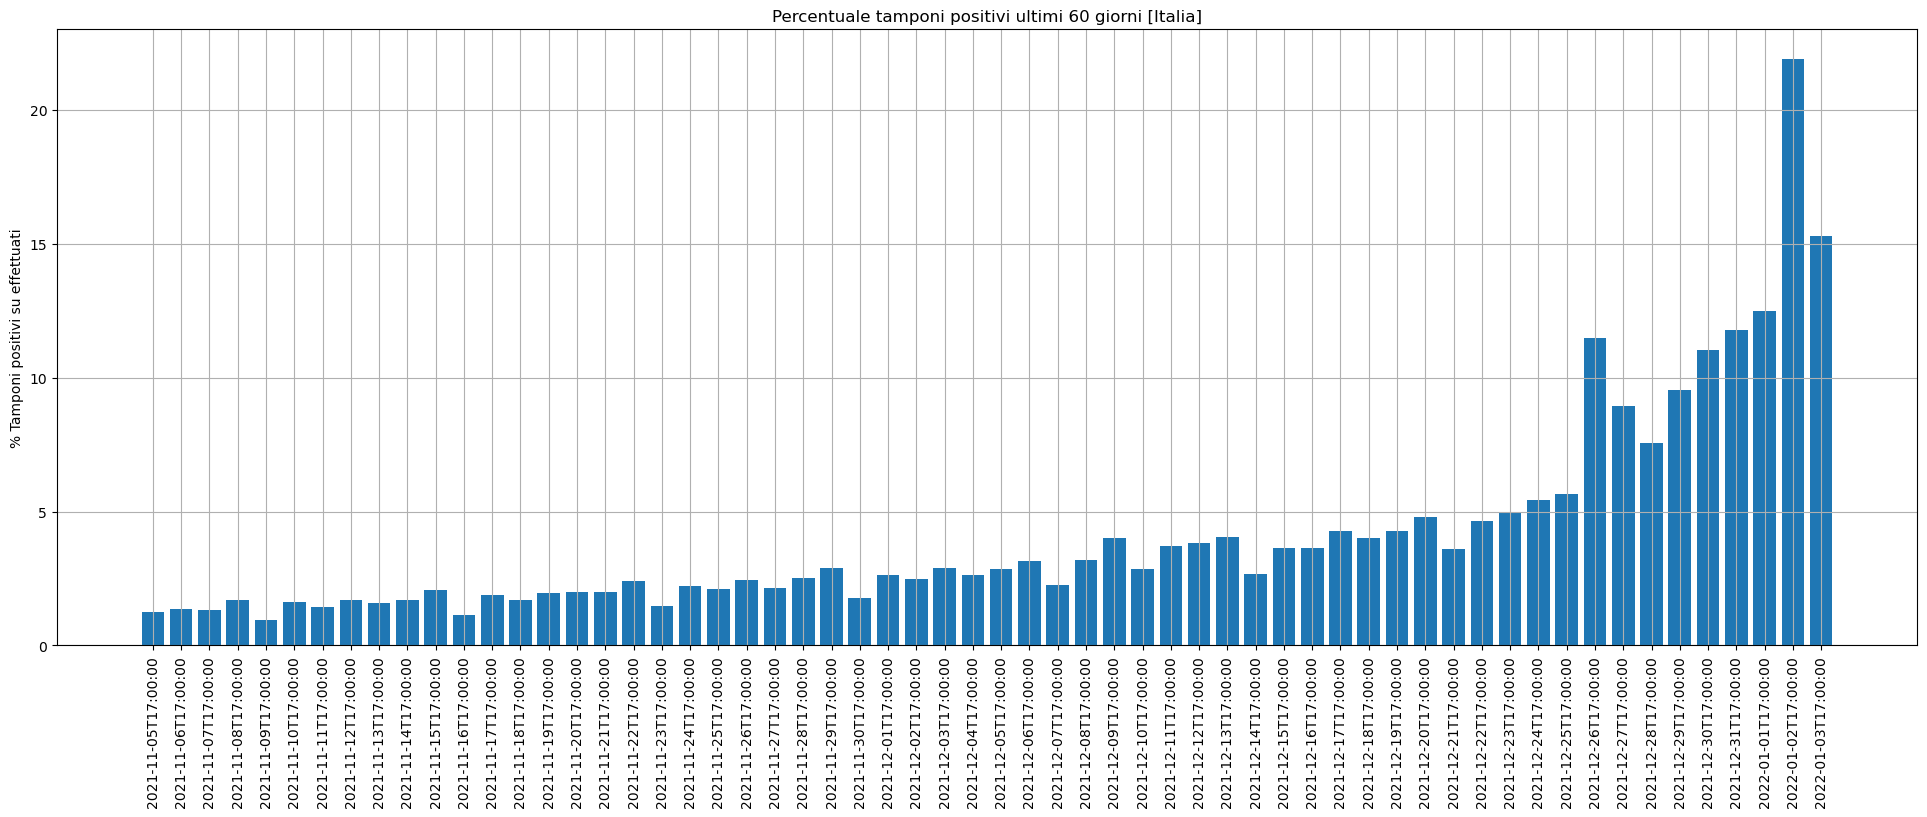

In [27]:
ultimi_giorni=60
regione='Italia'

plt.figure(figsize=(24,8))
plt.title('Percentuale tamponi positivi ultimi %d giorni [%s]'%(ultimi_giorni,regione))
plt.bar(range(ultimi_giorni),trend['perc_tamponi_positivi'][regione][-ultimi_giorni:])
plt.xticks(range(ultimi_giorni),giorni[-ultimi_giorni:],rotation=90)
plt.grid()
plt.ylabel('% Tamponi positivi su effettuati')
plt.show()

In [28]:
trend['perc_tamponi_positivi']['Italia'][-14:]

array([ 3.61536159,  4.65711026,  4.94702979,  5.44206932,  5.64701078,
       11.46407313,  8.95722858,  7.56883549,  9.52275485, 11.03036288,
       11.78431813, 12.4992042 , 21.90745512, 15.28156094])

### Regionale nel tempo

Percentuale tamponi positivi nel tempo nelle varie regioni

In [29]:
indicatori_selected=['perc_tamponi_positivi']

for indicatore in indicatori_selected:

    fig,ax=plt.subplots(grid_shape[0],grid_shape[1],sharey=False,figsize=(18,25))
    fig.suptitle(indicatore, y=1.02,fontsize=25)
    fig.tight_layout(pad=2.0)

    for i,regione in enumerate(regioni):
        ax[grid_cell[i][0],grid_cell[i][1]].plot(day_counter,moving_function_rev1(trend[indicatore][regione],np.nanmedian,5,5),'b-',label='Reg')
        ax[grid_cell[i][0],grid_cell[i][1]].set_title(regione)
        # plotto anche media italiana
        #ax[grid_cell[i][0],grid_cell[i][1]].plot(day_counter,trend[indicatore]['Italia'],'g--',label='Italia')
        #ax[grid_cell[i][0],grid_cell[i][1]].legend()
        #ax[grid_cell[i][0],grid_cell[i][1]].grid()

C:\Users\klaat\AppData\Roaming\Python\Python37\site-packages\numpy\lib\nanfunctions.py:1116: RuntimeWarning:

All-NaN slice encountered

C:\Users\klaat\AppData\Roaming\Python\Python37\site-packages\numpy\lib\nanfunctions.py:1116: RuntimeWarning:

All-NaN slice encountered



### Percentuale tamponi positivi nelle varie regioni

#### Odierna (media ultimi giorni)

**Media** dei tamponi positivi in percentuale su quelli effettuati negli ultimi giorni nelle varie regioni.

In [30]:
actual_perc_pos=[np.nanmean(trend['perc_tamponi_positivi'][r][-7:]) for r in regioni]
actual_perc_pos=np.array(actual_perc_pos)
ordine=np.argsort(actual_perc_pos)

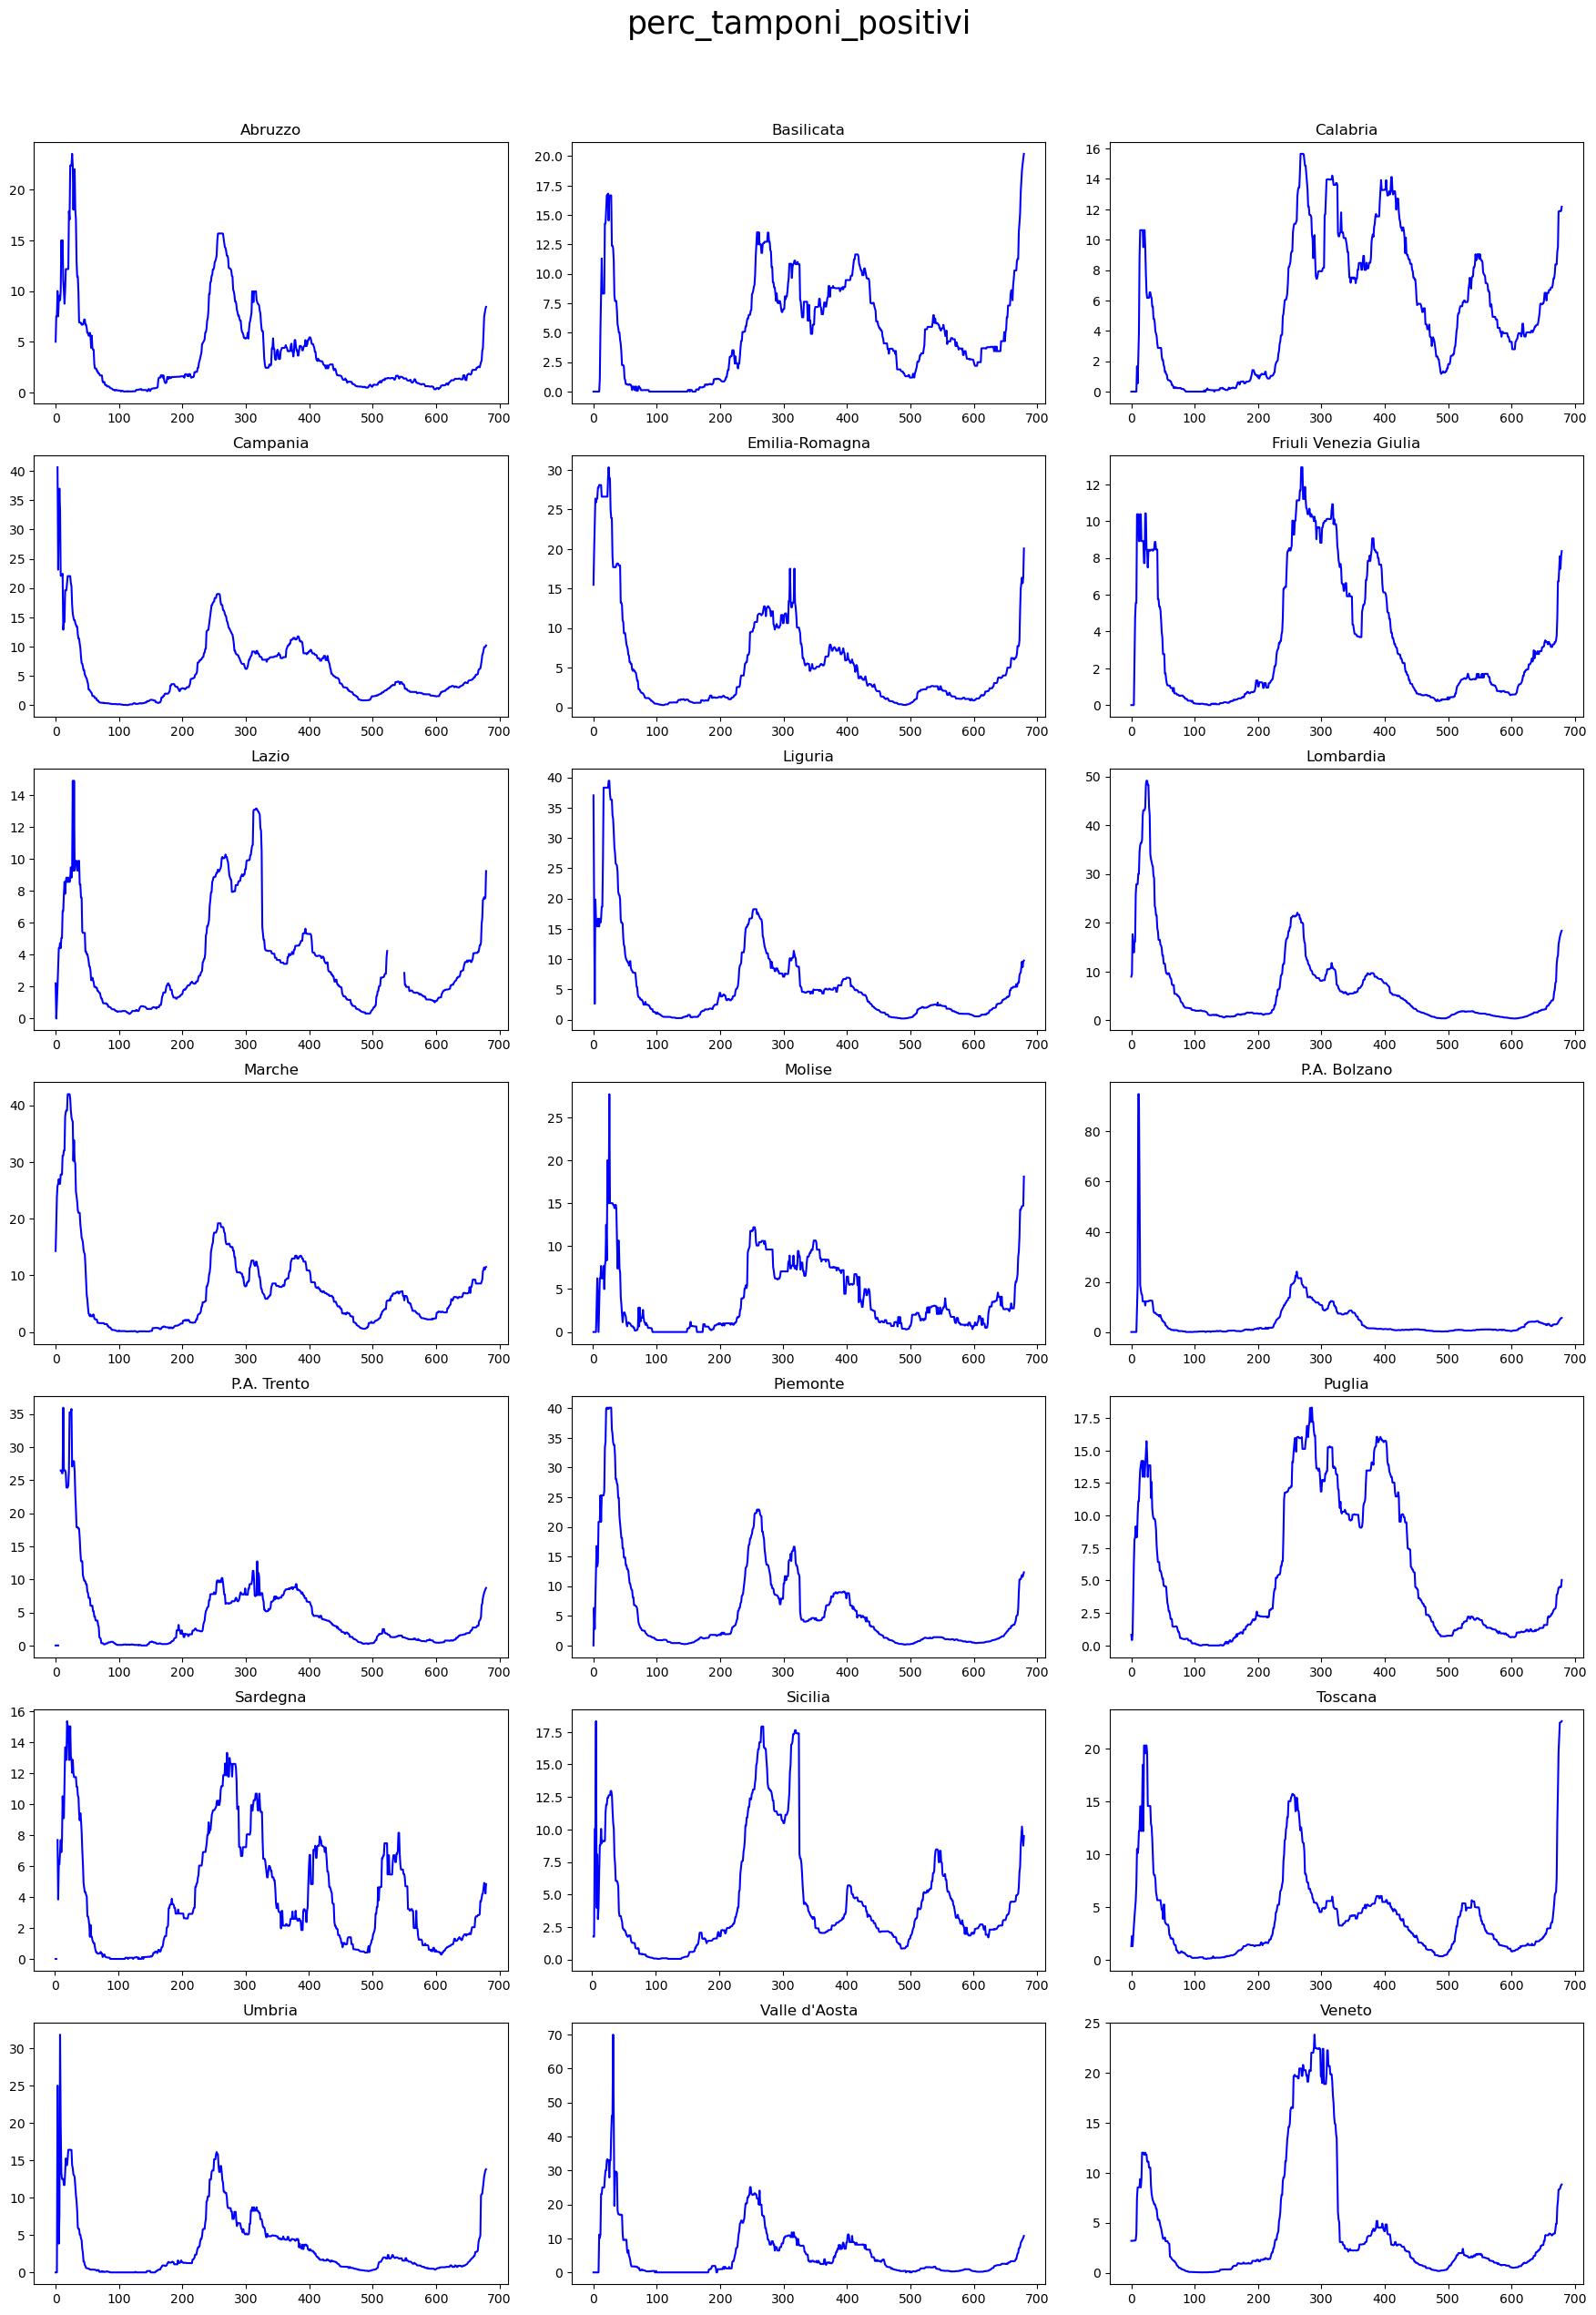

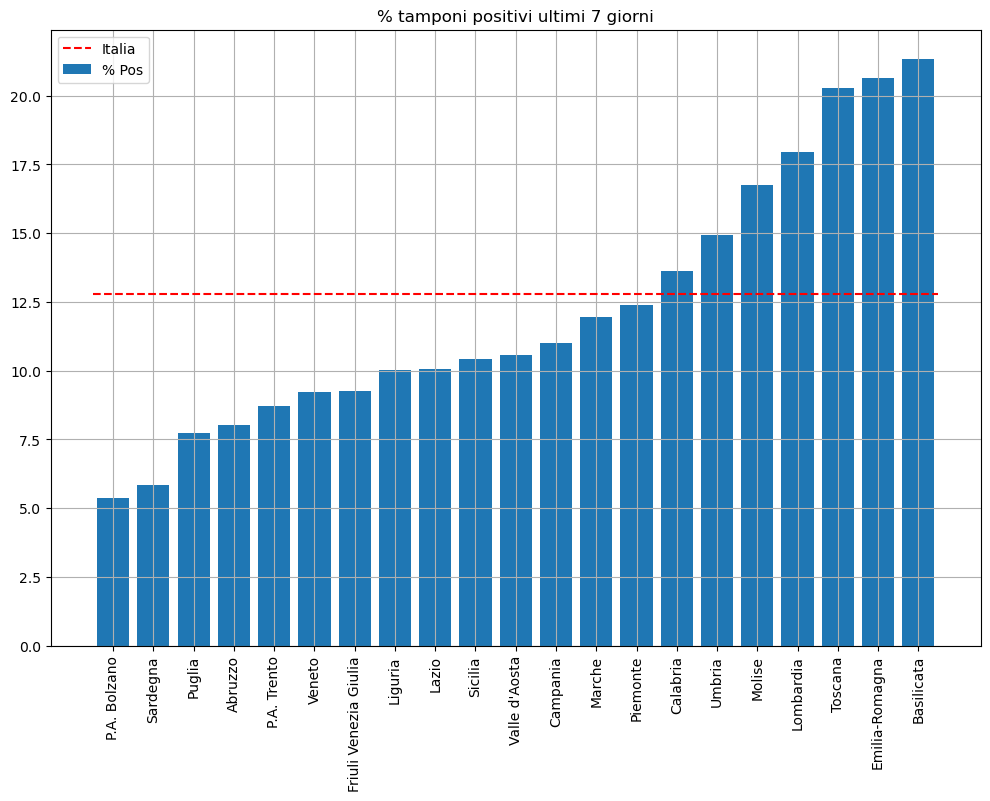

In [31]:
plt.figure(figsize=(12,8))
plt.title('% tamponi positivi ultimi 7 giorni')
plt.bar(range(len(regioni)),actual_perc_pos[ordine],label='% Pos')
plt.xticks(range(len(regioni)),regioni[ordine],rotation=90)
plt.hlines(np.nanmean(trend['perc_tamponi_positivi']['Italia'][-7:]),
           xmin=-0.5,xmax=20.5,
           label='Italia',color='r',ls='--')
plt.grid()
plt.legend()
plt.show()

## Mappa tamponi

In [32]:
trend['perc_tamponi_positivi']['Italia'][0]=trend['perc_tamponi_positivi']['Italia'][1]

fig,ax=plt.subplots(figsize=(10,7))

temp=aidam_distribution_map(trend['tamponi_giornalieri']['Italia'],
                       trend['perc_tamponi_positivi']['Italia'],
                            plotax=ax,
                            nxbins=20,nybins=20)

fig.colorbar(temp[1][3])

## Nuovi positivi *normalizzati*

In [33]:
from scipy.signal import savgol_filter
trend['perc_tamponi_positivi']['Italia'][0]=trend['perc_tamponi_positivi']['Italia'][1]

np_it=trend['nuovi_positivi']['Italia']


nwt=7
nwp=3

sm_np_it=moving_function_rev1(np_it,np.mean,nwt,nwt)

#gol_np_it=savgol_filter(np_it,13,2)

norm_np_it=0.01*np.multiply(moving_function_rev1(trend['tamponi_giornalieri']['Italia'],np.median,nwt,nwt),
                     moving_function_rev1(trend['perc_tamponi_positivi']['Italia'],np.mean,nwp,nwp))

norm_np_it=savgol_filter(norm_np_it,9,1)

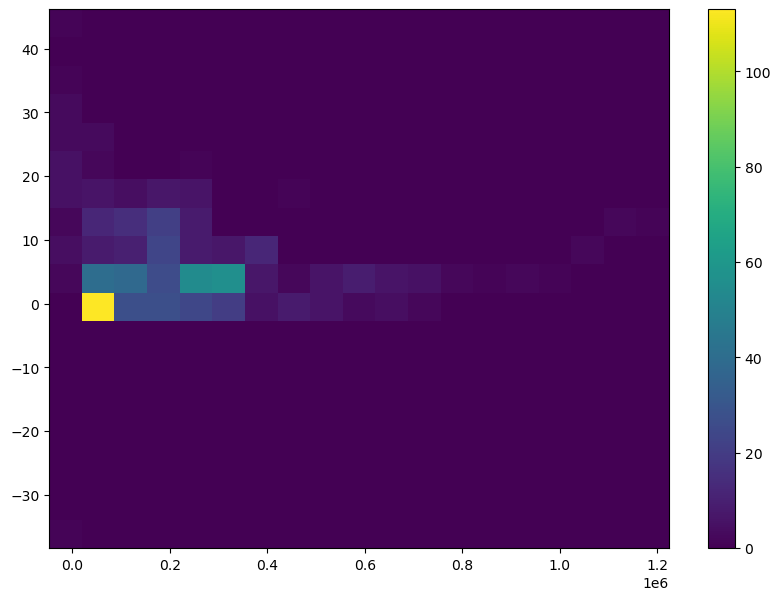

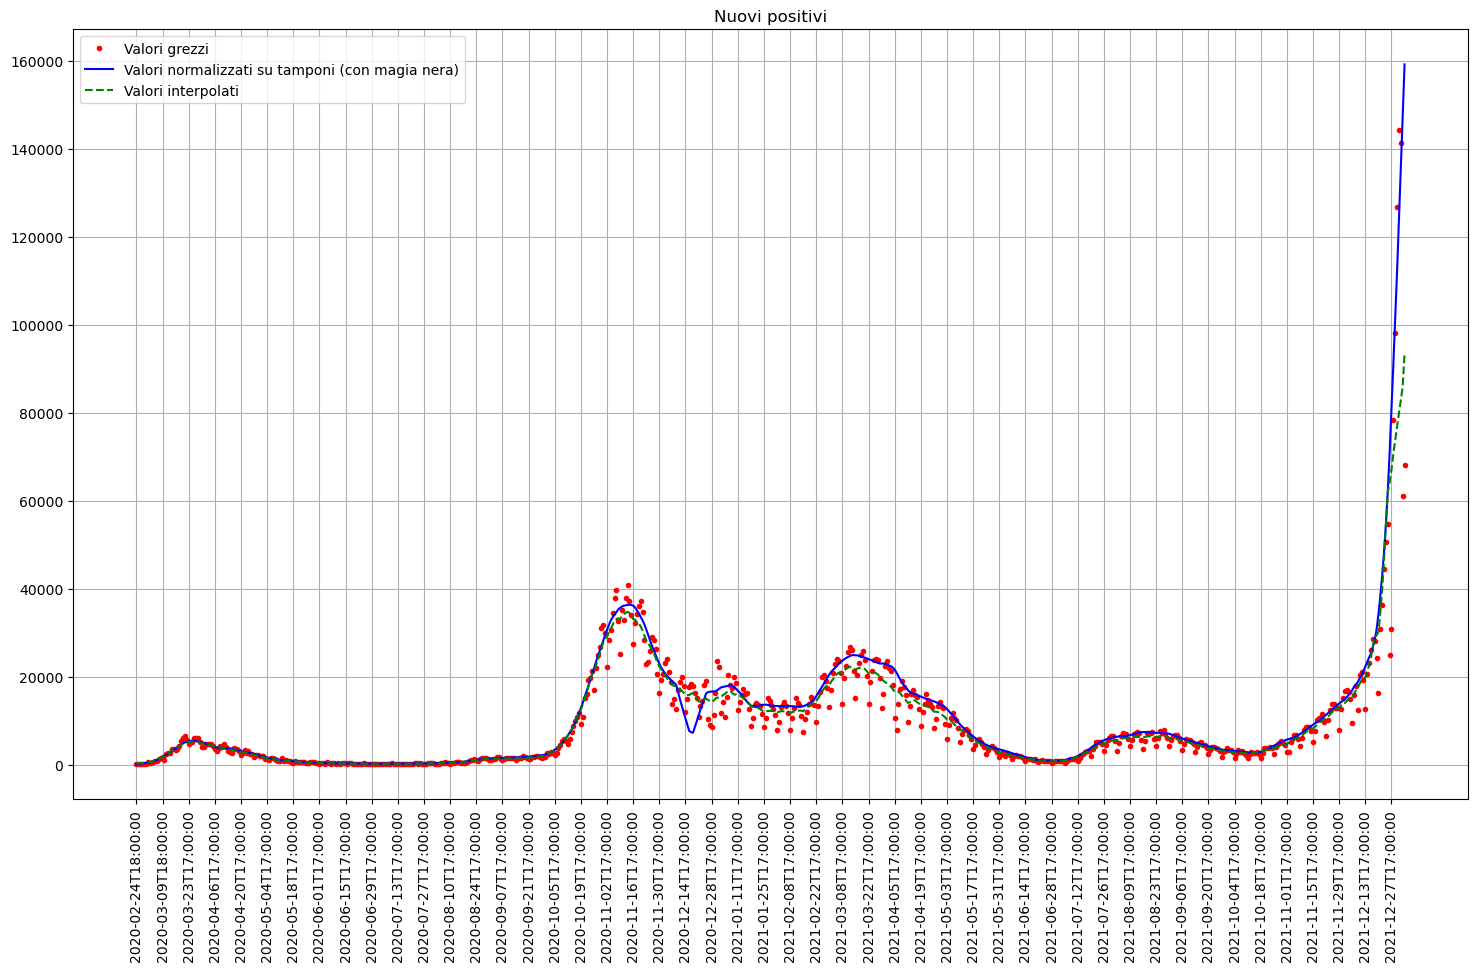

In [34]:
fig,ax=plt.subplots(1,figsize=(18,10))

ax.plot(np_it,'r.',label='Valori grezzi')
ax.plot(norm_np_it,'b',label='Valori normalizzati su tamponi (con magia nera)')
ax.plot(sm_np_it,'g--',label='Valori interpolati')

ax.set_title('Nuovi positivi')
ax.set_xticks(list(range(0,len(giorni),14)))
ax.set_xticklabels(giorni[list(range(0,len(giorni),14))],rotation=90)

ax.legend()
ax.grid()
plt.show()

## Plotly